<a href="https://colab.research.google.com/github/bhoomika297/Langchain-projects/blob/main/Multi_AI_agent_RAG_with_LangGraph%2C_AstraDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain cassio langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 855.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfull

In [2]:
import cassio
##connection of the Astra DB

ASTRA_DB_APPLICATION_TOKEN = "AstraCS:vEAZZfYHhZroegxGvZXRQlcb:2fba3c97259d3d8d94da46e7dc839b73159c6a943b1d1d665a12fded532ce7ba"
ASTRA_DB_ID = "039a2b5e-ee7f-4c0f-b6d3-6935d051de26"
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN,database_id=ASTRA_DB_ID)

ERROR:cassandra.connection:Closing connection <LibevConnection(136533444057344) 039a2b5e-ee7f-4c0f-b6d3-6935d051de26-us-east1.db.astra.datastax.com:29042:69fe24e5-0783-4085-ae0d-4da0d25d90dd> due to protocol error: Error from server: code=000a [Protocol error] message="Beta version of the protocol used (5/v5-beta), but USE_BETA flag is unset"


In [3]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00


In [4]:
!pip install -U tiktoken langchain-groq langchainhub langchain langgraph langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 17.1 MB/s eta 0:00:00


In [7]:
### Build Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

urls=[
    "https://www.datacamp.com/tutorial/langgraph-tutorial",
    "https://www.datacamp.com/tutorial/building-context-aware-chatbots-leveraging-langchain-framework-for-chatgpt",
    "https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-prompt-engineering"
]

##load url
docs = [WebBaseLoader(url).load() for url in urls]
doc_list=[item for sublist in docs for item in sublist]
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500,chunk_overlap=0)
docs_split = text_splitter.split_documents(doc_list)

In [8]:
docs_split

[Document(metadata={'source': 'https://www.datacamp.com/tutorial/langgraph-tutorial', 'title': 'Just a moment...', 'language': 'en-US'}, page_content='Just a moment...Enable JavaScript and cookies to continue'),
 Document(metadata={'source': 'https://www.datacamp.com/tutorial/building-context-aware-chatbots-leveraging-langchain-framework-for-chatgpt', 'title': 'Just a moment...', 'language': 'en-US'}, page_content='Just a moment...Enable JavaScript and cookies to continue'),
 Document(metadata={'source': 'https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-prompt-engineering', 'title': 'What is prompt engineering? | McKinsey', 'description': "In this McKinsey Explainer, we look into what prompt engineering is and explore why it's reshaping the way users interact with generative AI technology.", 'language': 'en'}, page_content='What is prompt engineering? | McKinsey\n\nSkip to main contentWhat is prompt engineering?March 22, 2024 | ArticlePrompt engineering is the pra

In [9]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLm-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings,
                               table_name="qa_mini_demo",
                               session=None,
                               keyspace=None)

In [14]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
print("Inserted %i headlines." % len(docs_split))
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 12 headlines.


In [15]:
retriever = astra_vector_store.as_retriever()
retriever.invoke("What is langgraph")

[Document(metadata={'description': "In this McKinsey Explainer, we look into what prompt engineering is and explore why it's reshaping the way users interact with generative AI technology.", 'language': 'en', 'source': 'https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-prompt-engineering', 'title': 'What is prompt engineering? | McKinsey'}, page_content='What is prompt engineering? | McKinsey\n\nSkip to main contentWhat is prompt engineering?March 22, 2024 | ArticlePrompt engineering is the practice of designing inputs for AI tools that will produce optimal outputs.An old fashioned type writer with a sheet of paper advancing from it. The paper has the pattern of a brain made of recently typed letters imprinted upon it. \n\n (6 pages)\nLet’s say you’re making spaghetti marinara for dinner. Sauce from a jar is perfectly fine. But what if you buy your tomatoes and basil from the farmers market to make your own sauce? Chances are it will taste a lot better. And what if

In [16]:
## Langgraph Application

from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

In [17]:
class RouteQuery(BaseModel):
  """Route a user query to the relevant datasource."""
  datasource: Literal["vectorstore","wiki_search"] = Field(
      ...,
      description="Given a user question choose to route it to wikipedia or a vectorstore.",
  )

In [19]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key = userdata.get('GROQ_API_KEY')
print(groq_api_key)

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


In [20]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Llama-3.1-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c2c0789b760>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c2c0789aaa0>, model_name='Llama-3.1-70b-versatile', groq_api_key=SecretStr('**********'))

In [21]:
structured_llm_router = llm.with_structured_output(RouteQuery)

In [22]:
#Prompt

system = """You are expert at routing a user question to a vectorstore or wikipedia.
         The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
         Use the vectorstore for question on these topics. Otherwise, use wiki-search."""
route_prompt = ChatPromptTemplate.from_messages(
    [("system",system),
    ("human","{question}"),
    ]
)

In [23]:
question_router = route_prompt|structured_llm_router

In [24]:
print(question_router.invoke({
    "question":"what is langchain"
}))

datasource='vectorstore'


In [25]:
print(question_router.invoke({
    "question":"where is taj mahel"
}))

datasource='wiki_search'


In [26]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=892b9f81c012f4fd0ed673c5f8141a492e8f7e539cf608b02743c17ec28ba966
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [27]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

In [30]:
wiki.run("what is  quantum mechanics")

'Page: Applications of quantum mechanics\nSummary: Quantum physics is a branch of modern physics in which energy and matter are described at their most fundamental level, that of energy quanta, elementa'

In [33]:
## AI Agent Application Using Langgraph

from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  """Represents the state of the graph
  Attributes:
  question: question
  generation: LLM generation
  documents: list of documents
  """

  question: str
  generation: str
  documents: List[str]

In [56]:
from langchain.schema import Document

def retrieve(state):
     """
         Retrieve documents

         Args:
             state (dict): the current graph state

         Returns:
          state (dict): New key added to state, documents, that contains retrieved documents
     """
     print("----Retriever----")
     questions = state["question"]

     ## Retrieval
     documents = retriever.invoke(questions)
     return {"documents":documents, "question":questions}



In [57]:
def wiki_search(state):
  """
  wiki search based on the re-phrased question.
  Args:
  state (dict): The current graph state

  Returns:
  state (dict): Updates documents key with appended web results

  """
  print("---wikipedia---")
  #print("---Hello---")
  question = state["question"]
  print(question)

  #wiki search
  docs = wiki.invoke({"query": question})
  #print(docs["summary"])
  wiki_results = docs
  wiki_results = Document(page_content=wiki_results)

  return {"documents": wiki_results,"question": question}

In [58]:
## Edges ##

def route_question(state):
  """
  Route Question to wiki search or RAG.

  ARGs:
  state (dict): The current graph state

  Returns:
  str: Next node to call
  """

  print("---ROUTE QUESTION---")
  question = state["question"]
  source = question_router.invoke({"question":question})
  if source.datasource == "wiki_search":
    print("---ROUTE QUESTION TO WIKI SEARCH---")
    return "wiki_search"
  elif source.datasource == "vectorstore":
    print("----ROUTE QUESTION TO RAG----")
    return "vectorstore"

In [59]:
from langgraph.graph import END, StateGraph,START

workflow = StateGraph(GraphState)
## Define the nodes
workflow.add_node("wiki_search",wiki_search)
workflow.add_node("retrieve",retrieve)

## build the graph
workflow.add_conditional_edges(
    START,
    route_question,{
        "wiki_search":"wiki_search",
        "vectorstore":"retrieve",
    },
)

workflow.add_edge("retrieve",END)
workflow.add_edge("wiki_search",END)

## compile
app = workflow.compile()

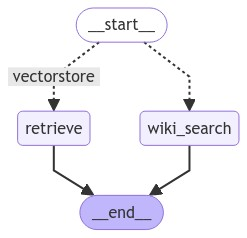

In [60]:
from IPython.display import Image, display

try:
  display(Image(app.get_graph().draw_mermaid_png()))

except Exception:
  #This require some extra dependencies and is optional
  print("error")


In [62]:
from pprint import pprint
inputs = {
    "question": "who is harry potter?"
}
for output in app.stream(inputs):
  for key, value in output.items():
    pprint(f"Node '{key}':")

  print("\n------\n")

pprint(value['documents'])



---ROUTE QUESTION---
---ROUTE QUESTION TO WIKI SEARCH---
---wikipedia---
who is harry potter?
"Node 'wiki_search':"

------

Document(page_content='Page: Harry Potter (character)\nSummary: Harry James Potter is a fictional character in the Harry Potter series of novels by J. K. Rowling. The plot of the seven-book series chronicles seven years in t')
